# A standardized simulation procedure

## Import packages

In [1]:
from hydrogenCommunity import hydrogenCommunity
import numpy as np
import pandas as pd
from random import randint
from PIL import Image

## Understand the aimed energy network and model configuration
Please review the figures to understand the aimed energy network and how AlphaHydrogen works

The framework of the aimed energy network in this version


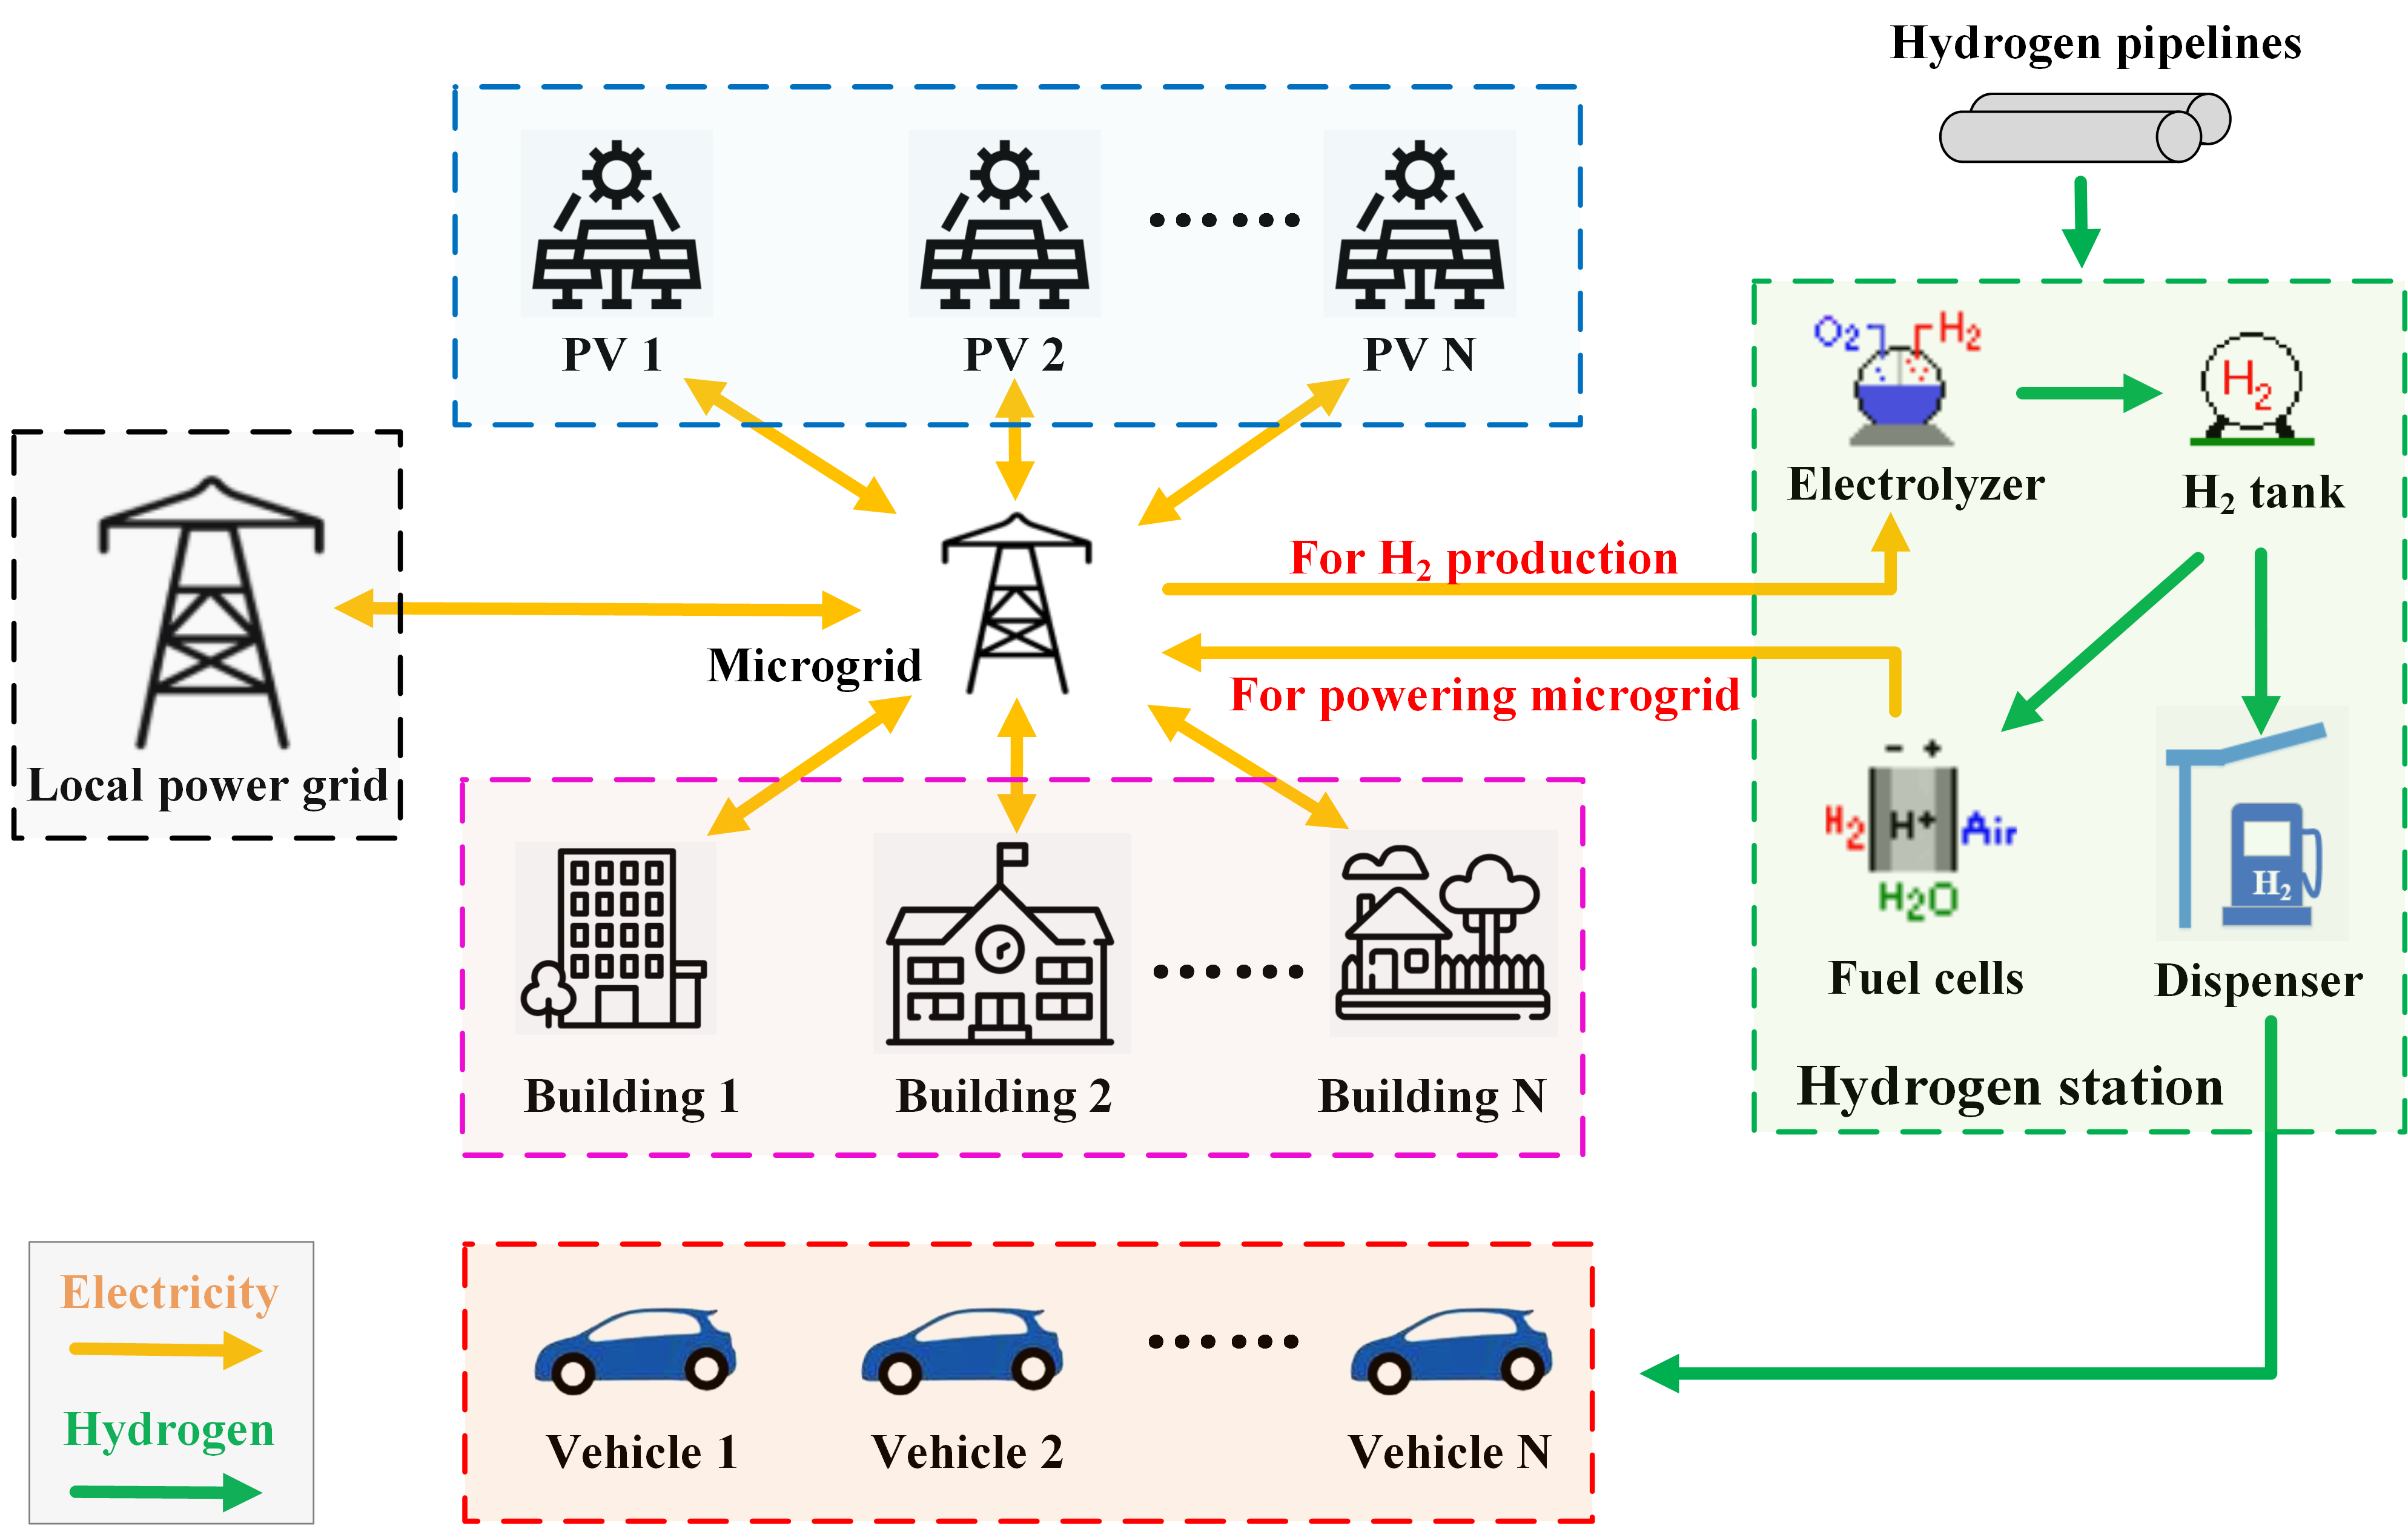

In [7]:
print('The framework of the aimed energy network in this version')
display(Image.open('inputs/Energy_network.png'))

The model configuration in AlphaHydrogen Environment in this version


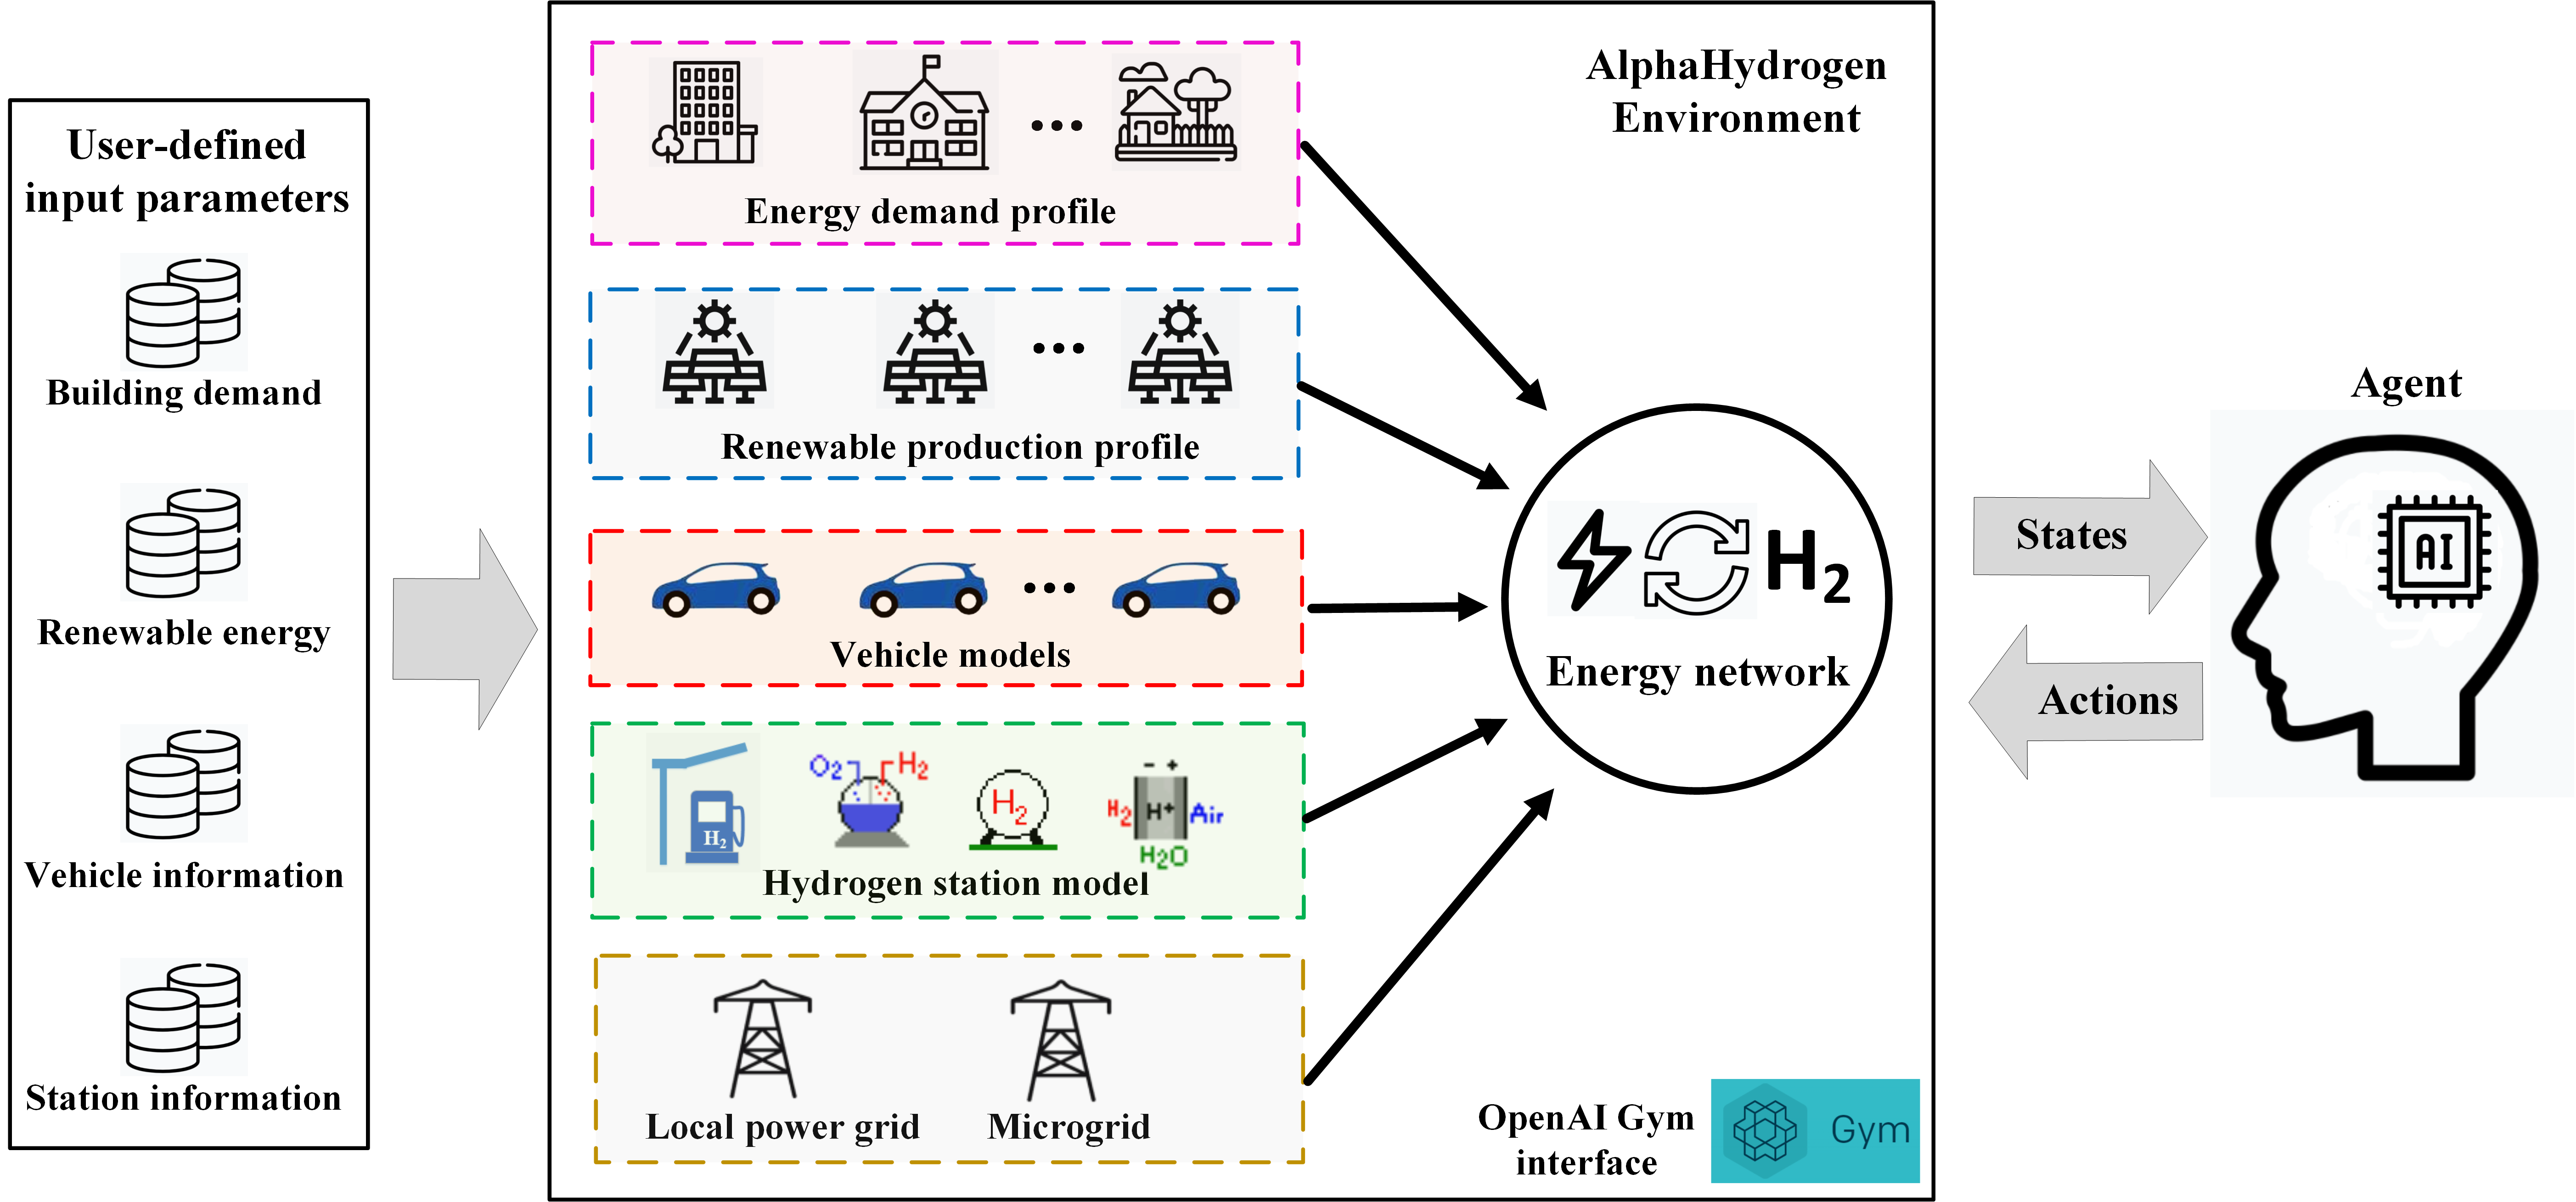

In [8]:
print('The model configuration in AlphaHydrogen Environment in this version')
display(Image.open('inputs/Model_configuration.png'))

## Load input files
Include building energy demands, renewable production, vehicle parking schedules and parameters, and hydrogen station parameters

In [ ]:
"""
Before loading input files, please make sure the parameters in each input file in folder 'input' are correctly entered:

1. Building files (like building1.csv):
    Building electric demands of 8760 hours (one year).The first column is the hour index, and the second column is the hourly power.
    
2. Renewable files (like pv1.csv):
    Renewable power values of 8760 hours (one year).The first column is the hour index, and the second column is the hourly power.
    
3. Vehicle schedule file (vehicle_atHomeSchd.csv):
    Parking schedules (within one day) of hydrogen vehicles of  are included. The first column is the hour index, and the other columns are different parking schedules: 1 means parking at home, and 0 means not at home.
    
4. Vehicle files (like vehicle1.csv):
    key parameters of hydrogen vehicles:
    -- fuelEff: H2 consumption per unit distance during transportation, unit in g/km.
    -- maxH2ChargingCapacity: maximum H2 charging capacity, g/s.
    -- tankCapacity: maximum hydrogen tank capacity of a hydrogen vehicle, unit in g.
    -- dist_mean_wd: mean daily cruise distance of a vehicle during working days, unit in km.
    -- dist_std_wd: standard deviation of daily cruise distance of a vehicle during working days, unit in km.
    -- dist_mean_nwd: mean daily cruise distance of a vehicle during non-working days, unit in km
    -- dist_std_nwd: standard deviation of daily cruise distance of a vehicle during non-working days, unit in km.
    -- parkSchd_wd: vehicle parking schedule for working days, corresponding to the column index of vehicle_atHomeSchd.csv.
    -- parkSchd_nwd: vehicle parking schedule for non-working days, corresponding to the column index of vehicle_atHomeSchd.csv.
    
5. Hydrogen station file (station_info.csv):
    key parameters of hydrogen station with an electrolyzer and fuel cells:
    -- elyEff: electrolyzer efficiency of converting electricity into H2 gas. Should be 0-1. 
    -- elyCap: maximum input power of electrolyzer for producting H2 gas, unit in kW.
    -- elyIdle: idling power of electrolyzer, unit in kW. Usually 10-20% of the maximum input power.
    -- fuelEff: fuel cell efficiency of converting H2 gas into electricity. Should be 0-1.
    -- fuelCap: maximum output power of fuel cell for generating electricity by consuming H2 gas, unit in kW.
    -- fuelIdle: idling power of fuel cells, unit in kW. Usually 10-20% of the maximum output power.
    -- tankCapacity: maximum tank capacity of the hydrogen station for storing onsite-renewable-produced H2 gas, unit in kg.
    -- chargeCapacity: maximum capacity of the hydrogen station for charging hydrogen vehicles, unit in kg/s.
"""

In [9]:
"""
Note:
1. In building_list, for ('inputs/building1.csv', 10), 'inputs/building1.csv' is the building demand file; '10' is the quantity of buildings
   which have the same demand profile as that in the building demand file.

2.In pv_list, for ('inputs/pv1.csv', 10), 'inputs/pv1.csv' is the renewable production file; '10' is the quantity of renewable sources
   which have the same production profile as that in the renewable production file.

3. In vehicle_list, for ('inputs/vehicle1.csv', 100, 300, 10), 'inputs/vehicle1.csv' is the vehicle parameter file, '100' and '300' are two
   parameters which are not used in this version (so do not need to change them), and '10' is the quantity of hydrogen vehicles which have
   the same parameters as those in the vehicle parameter file.
"""

building_list = [('inputs/building1.csv', 10), ('inputs/building2.csv', 10), ('inputs/building3.csv', 10)]
pv_list = [('inputs/pv1.csv', 10), ('inputs/pv2.csv', 10), ('inputs/pv3.csv', 10)]
vehicle_list = ['inputs/vehicle_atHomeSchd.csv', ('inputs/vehicle1.csv', 100, 300, 10), 
               ('inputs/vehicle2.csv', 100, 300, 10), ('inputs/vehicle3.csv', 100, 300, 10)]
station_info = 'inputs/station_info.csv'

## Check objects and initiate their states
check the key energy-related variables and then initiate AlphaHydrogen environment

In [10]:
# check the object names
env = hydrogenCommunity(building_list, pv_list, vehicle_list, station_info)
env.obs_names

c:\users\yingdong\gym\gym\logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


['buildingLoad',
 'pvGeneration',
 'tank_h2Vol',
 'tank_spareVol',
 'vehicle_park_0',
 'vehicle_park_1',
 'vehicle_park_2',
 'vehicle_park_3',
 'vehicle_park_4',
 'vehicle_park_5',
 'vehicle_park_6',
 'vehicle_park_7',
 'vehicle_park_8',
 'vehicle_park_9',
 'vehicle_park_10',
 'vehicle_park_11',
 'vehicle_park_12',
 'vehicle_park_13',
 'vehicle_park_14',
 'vehicle_park_15',
 'vehicle_park_16',
 'vehicle_park_17',
 'vehicle_park_18',
 'vehicle_park_19',
 'vehicle_park_20',
 'vehicle_park_21',
 'vehicle_park_22',
 'vehicle_park_23',
 'vehicle_park_24',
 'vehicle_park_25',
 'vehicle_park_26',
 'vehicle_park_27',
 'vehicle_park_28',
 'vehicle_park_29',
 'vehicle_max_dist_0',
 'vehicle_max_dist_1',
 'vehicle_max_dist_2',
 'vehicle_max_dist_3',
 'vehicle_max_dist_4',
 'vehicle_max_dist_5',
 'vehicle_max_dist_6',
 'vehicle_max_dist_7',
 'vehicle_max_dist_8',
 'vehicle_max_dist_9',
 'vehicle_max_dist_10',
 'vehicle_max_dist_11',
 'vehicle_max_dist_12',
 'vehicle_max_dist_13',
 'vehicle_max_dis

In [11]:
# check the action names
env.action_names

['station_tank',
 'vehicle_0',
 'vehicle_1',
 'vehicle_2',
 'vehicle_3',
 'vehicle_4',
 'vehicle_5',
 'vehicle_6',
 'vehicle_7',
 'vehicle_8',
 'vehicle_9',
 'vehicle_10',
 'vehicle_11',
 'vehicle_12',
 'vehicle_13',
 'vehicle_14',
 'vehicle_15',
 'vehicle_16',
 'vehicle_17',
 'vehicle_18',
 'vehicle_19',
 'vehicle_20',
 'vehicle_21',
 'vehicle_22',
 'vehicle_23',
 'vehicle_24',
 'vehicle_25',
 'vehicle_26',
 'vehicle_27',
 'vehicle_28',
 'vehicle_29']

In [12]:
# Check the initial state of objectives
state = env.reset()
state

[6.0,
 0.0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0]

In [13]:
# Check the time step, unit in hour
env.stepLenth
step_h = env.stepLenth/3600
step_h

1.0

## Deploy energy management strategies in Agent

In [14]:
# Set if the microgrid is connected to the hydrogen station and exports the renewable energy to produce hydrogen
def control_H2production(state):
    """
    Args:
        - signal_H2production: activation of H2 production
            if signal_H2production is set at 1, surplus renewable energy of the microgrid can be used for H2 production.
            if signal_H2production is set at 0, surplus renewable energy of the microgrid will be all dumped to the local power grid.
        
        - powerlimit: the lowerest power of activiating H2 production, unit in kW. If powerlimit is set at 30kW, H2 production is only 
                      activated when the renewable power of the microgrid is higher than 30 kW.

        - powershape: the aimed maximum renewable power dumped to the local power grid, unit in kW. If powershape is set at 30kW, the 
                      proposed energy network will try to keep the renewable power dupmed to the local power grid below 30 kW.But the final
                      dumped power will bedecided by multiple factors such as the H2 tank spare space and actual renewable power.
    """
    signal_H2production = 1
    powerlimit = 0
    powershape = 0
    buildingLoad = state[0]
    renewableGeneration = state[1]
    surplusRenewable = max(0.95 * renewableGeneration - buildingLoad, 0)
    
    if signal_H2production == 1:
        if surplusRenewable >= powerlimit:
            action = max(surplusRenewable - powershape,0)
        else:
            action = 0
    else:
        action = 0
    return action

# Set if the microgrid is connected to the hydrogen station and powered by consuming renewable-produced H2 stored in the hydrogen station
def control_powerGrid(state):
    """
    Args:
        - signal_powerGrid: activation of powering microgrid
            if signal_powerGrid is set at 1, renewable-produced H2 can be used to power microgrid through H2-electricity conversion.
            if signal_powerGrid is set at 0, renewable-produced H2 is not used to power microgrid.
        
        - powerlimit: the lowerest demand power of activiting H2-electricity conversion, unit in kW. If powerlimit is set at 30kW, 
                      H2-electricity conversion is only activated when the demand shortage of the microgrid is higher than 30 kW.

        - powershape: the aimed maximum demand shortage covered by the local power grid, unit in kW. If powershape is set at 30kW, the
                      proposed energy network will try to keep the import power of the local power grid below 30 kW.But the final import
                      power will be decided by multiple factors such as the available H2 volume and actual demand shoratge of the microgrid.
    """    
    signal_powerGrid = 0   
    powerlimit = 0
    powershape = 0
    buildingLoad = state[0]
    renewableGeneration = state[1]
    demandShortage = max(buildingLoad - 0.95 * renewableGeneration, 0)
    
    if signal_powerGrid == 1:
        if demandShortage >= powerlimit:
            action = max(demandShortage - powershape,0)
        else:
            action = 0
    else:
        action = 0
    return action


# Check states of building load and renewable prodcution, and decide the action
def check_load(state):
    if state[0]-0.95*state[1] <=0:
        action = control_H2production(state)
    else:
        action = -control_powerGrid(state)        
    return action

# Check states of vehicles and decide whether charge vehicles or not
def check_and_charge(vehicle):
    charge_threhold = 0.1
    if vehicle.tankVol < vehicle.tankCapacity*charge_threhold:
        action = vehicle.maxH2ChargingCapacity
    else:
        action = 0
    return action

## Simulation setup
Do NOT change any thing here

In [15]:
def gym_simulate(building_list, pv_list, vehicle_list, station_info):
    '''
    '''
    env = hydrogenCommunity(building_list, pv_list, vehicle_list, station_info)
    vehicles_number = len(env.vehicles)
    
    state_data = []
    action_data = []
    reward_data = []
    comment_data = []
    
    state = env.reset()
    for _ in range(env.n_steps):
        ############## Select Action ################### 
        time = env.timeIndex[env.time_step_idx]
        currentHour = time.hour
        actions = []
        if env.station.tankVol < 0:
            action = check_load(state)
        else:
            action = 0
        action = check_load(state)
        actions.append(action)
        if currentHour >= 19 and currentHour <= 21:
            for vehicle in env.vehicles:
                action = check_and_charge(vehicle)
                actions.append(action)
            actions = np.array(actions)
            print(f'{time}: charge rate: {actions[1:]}')
        else:
            for vehicle in env.vehicles:
                action = 0.0
                actions.append(action)
            actions = np.array(actions)
        ############## Simulate ###################
        #print(actions)
        new_state, rewards, done, comment= env.step(actions)

        state_data.append(state)
        action_data.append(actions)
        reward_data.append(rewards)
        comment_data.append(comment)
        
        state = new_state
        
        if done:
            print('Simulation is done!')
            # actions_data = buffer.action_data()
            states = pd.DataFrame(state_data, columns=env.obs_names, index=env.timeIndex)
            actions = pd.DataFrame(action_data, columns=env.action_names, index=env.timeIndex)
            rewards = pd.DataFrame(reward_data, columns=['gridLoad','H2Change'], index=env.timeIndex)
            comments = pd.DataFrame(comment_data, columns=['H2_accumUse','H2Production', 'H2forGrid', 'H2forVehicle'], index=env.timeIndex)
            # obs_data.to_csv('result_ep{0}.csv'.format(ep))
            
    return states, actions, rewards, comments

## Run simulation
In this version, only the time steps in which the actions of vehicles might appear are shown during the simulation procedure.

In [16]:
states, actions, rewards, comments = gym_simulate(building_list, pv_list, vehicle_list, station_info)

c:\users\yingdong\gym\gym\logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


2019-01-01 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
2019-01-01 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-01-01 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-01-02 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-01-02 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-01-02 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-01-03 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-01-03 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  

2019-01-26 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-01-26 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-01-26 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-01-27 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-01-27 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-01-27 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-01-28 19:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
2019-01-28 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-01-28 21:00:00: charge rate: [0 0 0 0 0 0 0 

2019-02-19 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-02-19 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-02-19 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-02-20 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-02-20 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-02-20 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-02-21 19:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
2019-02-21 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-02-21 21:00:00: charge rate: [0 0 0 0 0 0 0 

  0.  0. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
2019-03-20 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-03-20 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-03-21 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-03-21 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-03-21 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-03-22 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-03-22 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-03-22 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

2019-04-12 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-04-12 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-04-12 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-04-13 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
2019-04-13 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-04-13 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-04-14 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-04-14 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-04-14 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-04-15 19:

2019-05-07 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
2019-05-07 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-05-07 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-05-08 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-05-08 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-05-08 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-05-09 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-05-09 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  

2019-06-04 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-06-05 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-06-05 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-06-05 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-06-06 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
2019-06-06 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-06-06 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-06-07 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-06-07 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-06-07 21:

 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-07-02 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-07-03 19:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
2019-07-03 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-07-03 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-07-04 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-07-04 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-07-04 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-07-05 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

2019-07-27 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-07-28 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-07-28 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-07-28 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-07-29 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-07-29 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-07-29 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-07-30 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
2019-07-30 20:00:00: charge rate: [ 0.  0.  0.  0

2019-08-22 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-08-22 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-08-22 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-08-23 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
2019-08-23 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-08-23 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-08-24 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-08-24 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-08-24 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-08-25 19:

 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-09-18 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-09-19 19:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
2019-09-19 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-09-19 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-09-20 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-09-20 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-09-20 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-09-21 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

2019-10-14 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-10-15 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-10-15 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-10-15 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-10-16 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
2019-10-16 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-10-16 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-10-17 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-10-17 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-10-17 21:

2019-11-13 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-11-14 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-11-14 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-11-14 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-11-15 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
2019-11-15 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-11-15 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-11-16 19:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-11-16 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-11-16 21:

2019-12-10 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-12-11 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-12-11 20:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2019-12-11 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-12-12 19:00:00: charge rate: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
2019-12-12 20:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-12-12 21:00:00: charge rate: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2019-12-13 19:00:00: charge rate: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  

## Results

In [17]:
# The hourly results of states
states

,buildingLoad,pvGeneration,tank_h2Vol,tank_spareVol,vehicle_park_0,vehicle_park_1,vehicle_park_2,vehicle_park_3,vehicle_park_4,vehicle_park_5,...,vehicle_tank_20,vehicle_tank_21,vehicle_tank_22,vehicle_tank_23,vehicle_tank_24,vehicle_tank_25,vehicle_tank_26,vehicle_tank_27,vehicle_tank_28,vehicle_tank_29
2019-01-01 00:00:00,6.000000,0.0,0.000000,0.000000,1,1,1,1,1,1,...,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
2019-01-01 01:00:00,6.000000,0.0,0.000000,1000.000000,1,1,1,1,1,1,...,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
2019-01-01 02:00:00,6.000000,0.0,0.000000,1000.000000,1,1,1,1,1,1,...,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
2019-01-01 03:00:00,6.152778,0.0,0.000000,1000.000000,1,1,1,1,1,1,...,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
2019-01-01 04:00:00,11.819444,0.0,0.000000,1000.000000,1,1,1,1,1,1,...,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,91.326389,0.0,901.662901,98.337099,1,1,1,1,1,1,...,5739.0,5478.0,5217.0,4956.0,4695.0,4434.0,4173.0,3912.0,3651.0,3390.0
2019-12-31 20:00:00,88.138889,0.0,901.662901,98.337099,1,1,1,1,1,1,...,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0
2019-12-31 21:00:00,92.541667,0.0,892.962901,107.037099,1,1,1,1,1,1,...,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0
2019-12-31 22:00:00,23.506944,0.0,886.002901,113.997099,1,1,1,1,1,1,...,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0,3390.0


In [18]:
# The hourly results of actions
actions

,station_tank,vehicle_0,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,vehicle_6,vehicle_7,vehicle_8,...,vehicle_20,vehicle_21,vehicle_22,vehicle_23,vehicle_24,vehicle_25,vehicle_26,vehicle_27,vehicle_28,vehicle_29
2019-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,0.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# The hourly results of rewards
rewards

,gridLoad,H2Change
2019-01-01 00:00:00,6.000000,0.00
2019-01-01 01:00:00,6.000000,0.00
2019-01-01 02:00:00,6.000000,0.00
2019-01-01 03:00:00,6.152778,0.00
2019-01-01 04:00:00,11.819444,0.00
...,...,...
2019-12-31 19:00:00,91.326389,-8.70
2019-12-31 20:00:00,88.138889,-6.96
2019-12-31 21:00:00,92.541667,0.00
2019-12-31 22:00:00,23.506944,0.00


In [20]:
# The hourly results of comments
comments

,H2_accumUse,H2Production,H2forGrid,H2forVehicle
2019-01-01 00:00:00,-0.000000,0.0,0,0.00
2019-01-01 01:00:00,-0.000000,0.0,0,0.00
2019-01-01 02:00:00,-0.000000,0.0,0,0.00
2019-01-01 03:00:00,-0.000000,0.0,0,0.00
2019-01-01 04:00:00,-0.000000,0.0,0,0.00
...,...,...,...,...
2019-12-31 19:00:00,-892.962901,0.0,0,8.70
2019-12-31 20:00:00,-886.002901,0.0,0,6.96
2019-12-31 21:00:00,-886.002901,0.0,0,0.00
2019-12-31 22:00:00,-886.002901,0.0,0,0.00


## Check results of a customized period
Note: if a figure does not show after running the cell for the first time, run the cell twice.

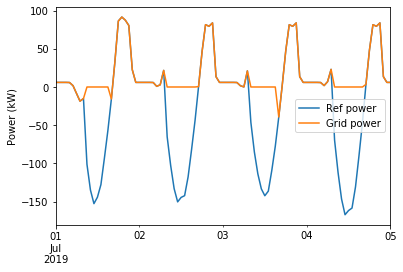

In [22]:
# Grid power
# Ref power: the grid power if the energy network is not intergrated with the hydrogen station
time_before = '2019-07-1'
time_after = '2019-07-5'
(states['buildingLoad'] - 0.95*states['pvGeneration']).truncate(before=time_before, after=time_after).plot(ylabel='Power (kW)',label='Ref power',legend = True)
rewards['gridLoad'].truncate(before=time_before, after=time_after).plot(label='Grid power',legend = True)

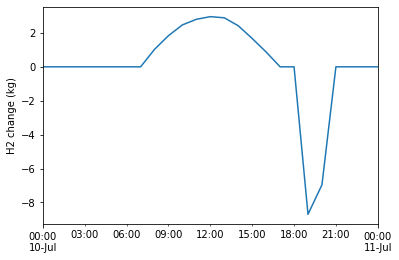

In [23]:
# H2 volume change
rewards['H2Change'].truncate(before='2019-07-10', after='2019-07-11').plot(ylabel='H2 change (kg)')

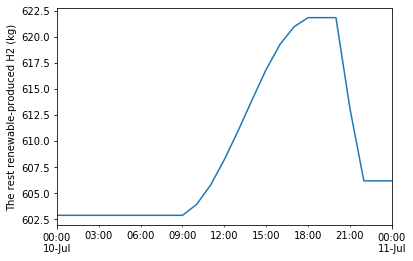

In [24]:
# H2 volume
states['tank_h2Vol'].truncate(before='2019-07-10', after='2019-07-11').plot(ylabel='The rest renewable-produced H2 (kg)')

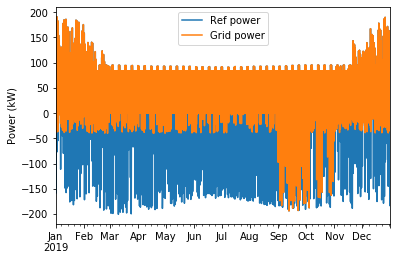

In [25]:
# Hourly grid power
# Ref power: the grid power if the energy network is not intergrated with the hydrogen station
(states['buildingLoad'] - 0.95*states['pvGeneration']).plot(ylabel='Power (kW)',label='Ref power',legend = True)
(rewards['gridLoad']).plot(label='Grid power',legend = True)

## Energy independence

In [26]:
buildingIndep = (1 - rewards.loc[rewards['gridLoad'] > 0, ['gridLoad']]['gridLoad'].sum()/states['buildingLoad'].sum())*100
print(f'{buildingIndep:.2f}% of the building energy demand is covered by the renewable and energy-storage systems.')

24.31% of the building energy demand is covered by the renewable and energy-storage systems.


In [27]:
vehicleIndep = (comments['H2Production'].sum()-comments['H2forGrid'].sum())/comments['H2forVehicle'].sum() if (comments['H2Production'].sum()-comments['H2forGrid'].sum())< comments['H2forVehicle'].sum() else 1
print(f'{vehicleIndep*100:.2f}% of the transportation energy is covered by the onsite-renewable-produced H2.')

100.00% of the transportation energy is covered by the onsite-renewable-produced H2.


## Net energy consumption and carbon reduction

In [29]:
carbonFac_ele = 0.386 # kg CO2 per kWh of grid electricity
carbonFac_gas = 18.74 # kg CO2 per gallon of gasoline for vehicles
gasolineEff = 25.7 * 1.609 # km per gallon of gasoline for normal vehicle transportation 
vehicleEff = 8.7 # g H2 per km of transportation, make sure this value is the same as that of fuelEff in the vehicle input csv file

grid_importEle = rewards.loc[rewards['gridLoad'] > 0, ['gridLoad']]['gridLoad'].sum()
grid_exportEle = rewards.loc[rewards['gridLoad'] < 0, ['gridLoad']]['gridLoad'].sum()

gridEle = rewards['gridLoad'].sum()*step_h
buildDem = states['buildingLoad'].sum()*step_h
vehicleDem = comments['H2forVehicle'].sum()*step_h
carbonEmis_bu =  gridEle * carbonFac_ele
carbonRedu_bu = (buildDem - gridEle) * carbonFac_ele
H2Pro = comments['H2Production'].sum()*step_h
H2Tran = comments['H2forVehicle'].sum()*step_h
H2Grid = comments['H2forGrid'].sum()*step_h
H2net = H2Tran+H2Grid - H2Pro

totalDistance = H2Tran*1000/vehicleEff
carbonRedu_veh = totalDistance/gasolineEff * carbonFac_gas

carbonTotal = carbonRedu_bu + carbonRedu_veh 

print(f'Annual net grid electricity consumption:{gridEle:.2f} kWh.')
print(f'Annual building net carbon emission: {carbonEmis_bu:.2f} kg.')
print(f'Annual building carbon reduction: {carbonRedu_bu:.2f} kg.')
print(f'Annual H2 demand for transportation:{H2Tran:.2f} kg.')
print(f'Annual net H2 consumption:{H2net:.2f} kg.')
print(f'Annual carbon reduction by using H2 instead of gasoline for transportation:{carbonRedu_veh:.2f} kg.')
print(f'Total annual carbon reduction:{carbonTotal:.2f} kg.')

if gridEle <= 0:
    print('The energy network has actualized zero carbon emission!')
else:
    print('The energy network has NOT actualized zero carbon emission!')


Annual net grid electricity consumption:165591.45 kWh.
Annual building net carbon emission: 63918.30 kg.
Annual building carbon reduction: 37623.73 kg.
Annual H2 demand for transportation:3816.99 kg.
Annual net H2 consumption:-886.00 kg.
Annual carbon reduction by using H2 instead of gasoline for transportation:198830.13 kg.
Total annual carbon reduction:236453.86 kg.
The energy network has NOT actualized zero carbon emission!


## Grid Flexibility

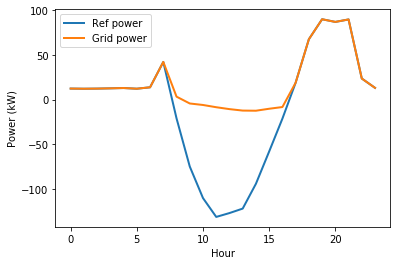

In [30]:
# Mean hourly grid power
buildingLoad = states['buildingLoad'].groupby(states.index.hour).mean()
reGeneration = states['pvGeneration'].groupby(states.index.hour).mean()
gridPower = rewards['gridLoad'].groupby(rewards.index.hour).mean()

(buildingLoad - 0.95*reGeneration).truncate(before='0', after='24').plot(lw=2, xlabel='Hour', ylabel='Power (kW)',label='Ref power',legend = True)
gridPower.truncate(before='0', after='24').plot(lw=2, label='Grid power',legend =True)

#gridPower

In [31]:
gridImport = rewards.loc[rewards['gridLoad'] > 0, ['gridLoad']]
gridImport_time = gridImport['gridLoad'].count()*step_h
gridImport_power = gridImport['gridLoad'].mean()

print(f'Annual hours of importing electricity from the local power grid:{gridImport_time:.2f} h.')
print(f'Average grid-import power: {gridImport_power:.2f} kW.')

gridExport = rewards.loc[rewards['gridLoad'] < 0, ['gridLoad']]
gridExport_time = gridExport['gridLoad'].count()*step_h
gridExport_power = gridExport['gridLoad'].mean()

print(f'Annual hours of exporting electricity from the local power grid:{gridExport_time:.2f} h.')
print(f'Average grid-export power: {gridExport_power:.2f} kW.')

Annual hours of importing electricity from the local power grid:5604.00 h.
Average grid-import power: 35.53 kW.
Annual hours of exporting electricity from the local power grid:964.00 h.
Average grid-export power: -34.78 kW.
